In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
#import os

# Machine Learning libraries
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.metrics import log_loss


pd.set_option('display.max_columns', None)
# from google.colab import files
import warnings
warnings.filterwarnings('ignore')

In [2]:
path = r"C:\Users\KENNEDY\OneDrive\Desktop\alvin calssifiacation"

In [88]:
# Load the files into a Pandas Dataframe
train = pd.read_csv(path+ '\Train.csv')
test = pd.read_csv(path+'\Test.csv')
ss = pd.read_csv(path+'\SampleSubmission.csv')
extradata = pd.read_csv(path+'\extra_data.csv')

In [4]:
train_id = train.pop('Transaction_ID')
test_id = test.pop('Transaction_ID')

In [5]:
# Let’s observe the shape of our datasets.
print('Train data shape :', train.shape)
print('Test data shape :', test.shape)

Train data shape : (373, 11)
Test data shape : (558, 10)


<BarContainer object of 373 artists>

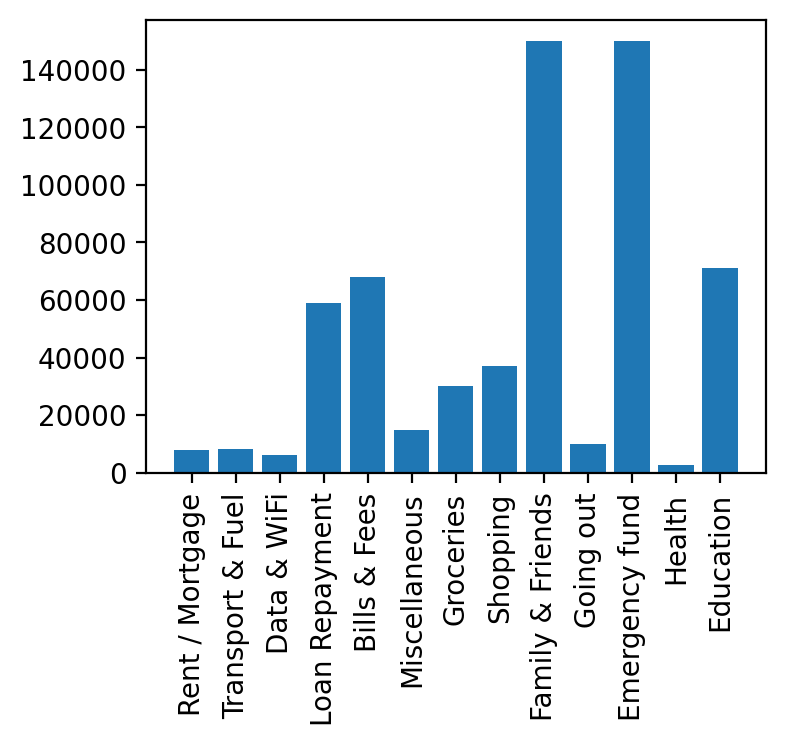

In [6]:
# Show a bar graph of the purchase_value vs the target in the train data (merchant_categorized_as)
plt.figure(dpi=200, figsize=(4,3))
plt.xticks(rotation=90)
plt.bar(data=train, x='MERCHANT_CATEGORIZED_AS', height='PURCHASE_VALUE')

In [10]:
def trans_to_date(data):
    """ Convert columns to datetime format """
    new_data = data.copy()
    new_data['MERCHANT_CATEGORIZED_AT']= pd.to_datetime(new_data['MERCHANT_CATEGORIZED_AT'])
    new_data['PURCHASED_AT']= pd.to_datetime(new_data['PURCHASED_AT'])

    return new_data


In [11]:
train = trans_to_date(train)
test = trans_to_date(test)

In [13]:
from sklearn.preprocessing import LabelEncoder

In [14]:
le = LabelEncoder()

def make_encoder(data):
    

    """Funtion to encode columns that are objects """
  
    data_copy = data.copy()
    #data_copy = data_copy['IS_PURCHASE_PAID_VIA_MPESA_SEND_MONEY'].astype('O')
    for col in data_copy.columns:
        if (data_copy[col].dtype == 'O') or (data_copy[col].dtype == 'bool'):
            data_copy[col] = le.fit_transform(data_copy[col])
    return data_copy


In [15]:
def f(x):
    if (x > 4) and (x <= 8):
        return 'Early Morning'
    elif (x > 8) and (x <= 12 ):
        return 'Morning'
    elif (x > 12) and (x <= 16):
        return'Noon'
    elif (x > 16) and (x <= 20) :
        return 'Eve'
    elif (x > 20) and (x <= 24):
        return'Night'
    elif (x <= 4):
        return'Late Night'

In [16]:
def get_time_diff(data):
  """ Getting what time of day it was, noon,morning... and the diff in minutes
      from purchased_at and merechant_categorized_at"""
  new_data = data.copy()
  new_data['merchant_cat_at_time_of_day'] = new_data['MERCHANT_CATEGORIZED_AT'].dt.hour.apply(f)
  new_data['purchased_at_time_of_day'] = new_data['PURCHASED_AT'].dt.hour.apply(f)
  new_data['diff_minutes'] = np.absolute(new_data['PURCHASED_AT'] - new_data['MERCHANT_CATEGORIZED_AT']).astype('timedelta64[m]')
  new_data.drop('PURCHASED_AT',1,inplace=True)
  new_data.drop('MERCHANT_CATEGORIZED_AT',1,inplace=True)
  return new_data

test = get_time_diff(test)
train = get_time_diff(train)

In [17]:
train

,MERCHANT_NAME,MERCHANT_CATEGORIZED_AS,PURCHASE_VALUE,IS_PURCHASE_PAID_VIA_MPESA_SEND_MONEY,USER_AGE,USER_GENDER,USER_HOUSEHOLD,USER_INCOME,USER_ID,merchant_cat_at_time_of_day,purchased_at_time_of_day,diff_minutes
0,UONSDA CHURCH MOGERE MWAYO TITHE,Rent / Mortgage,1700,False,NaN,Male,3,10000,ID_ZX4DCF4K,Morning,Noon,210.0
1,PARK N GO,Transport & Fuel,100,False,25.0,Female,4,90000,ID_U9WZMGJZ,Noon,Noon,1566.0
2,SAFARICOM OFFERS TUNUKIWA,Data & WiFi,20,False,NaN,Male,3,10000,ID_ZX4DCF4K,Noon,Morning,9988.0
3,ZILLIONS CREDIT LIMITED,Loan Repayment,3800,False,NaN,Male,5,252000,ID_3JA0MAFB,Noon,Morning,92383.0
4,MICHAEL MUSEMBI,Bills & Fees,60,False,NaN,Male,3,10000,ID_ZX4DCF4K,Morning,Noon,303.0
...,...,...,...,...,...,...,...,...,...,...,...,...
368,ONESMUS GAKURU,Miscellaneous,500,True,27.0,Female,2,8000,ID_L8QMYB09,Morning,Noon,28929.0
369,GLADWELL MBURU,Miscellaneous,400,True,NaN,Male,5,750000,ID_D8FOVVBB,Noon,Early Morning,13398.0
370,SAFARICOM LIMITED,Data & WiFi,500,False,NaN,Male,3,200000,ID_ECX9BS4A,Early Morning,Noon,460373.0
371,EQUITY PAYBILL ACCOUNT,Bills & Fees,14000,True,25.0,Female,4,90000,ID_U9WZMGJZ,Morning,Morning,4203.0


In [18]:
train = make_encoder(train)
test = make_encoder(test)
test.head()

,MERCHANT_NAME,PURCHASE_VALUE,IS_PURCHASE_PAID_VIA_MPESA_SEND_MONEY,USER_AGE,USER_GENDER,USER_HOUSEHOLD,USER_INCOME,USER_ID,merchant_cat_at_time_of_day,purchased_at_time_of_day,diff_minutes
0,145,150000,1,NaN,1,5,150000,20,3,0,38996.0
1,107,7394,0,NaN,0,1,10000,5,4,5,1285743.0
2,127,200,0,NaN,0,1,85000,2,1,3,151709.0
3,297,50,0,NaN,1,2,10000,15,4,5,1511.0
4,166,10000,0,NaN,1,3,10000,29,3,5,214.0


In [19]:
train["USER_GENDER"] = train["USER_GENDER"].apply(lambda x: "Male" if pd.isna(x) else x)
test["USER_GENDER"] = test["USER_GENDER"].apply(lambda x: "Male" if pd.isna(x) else x)

In [21]:
# Impute the missing age entries with the median of that column
train_median_value = np.median(train['USER_AGE'].dropna())
train['USER_AGE'] = train['USER_AGE'].fillna(train_median_value)

test_median_value = np.median(test['USER_AGE'].dropna())
test['USER_AGE'] = test['USER_AGE'].fillna(test_median_value)

In [23]:
train.head()

,MERCHANT_NAME,MERCHANT_CATEGORIZED_AS,PURCHASE_VALUE,IS_PURCHASE_PAID_VIA_MPESA_SEND_MONEY,USER_AGE,USER_GENDER,USER_HOUSEHOLD,USER_INCOME,USER_ID,merchant_cat_at_time_of_day,purchased_at_time_of_day,diff_minutes
0,206,10,1700,0,25.0,1,3,10000,24,3,5,210.0
1,150,12,100,0,25.0,0,4,90000,20,4,5,1566.0
2,175,1,20,0,25.0,1,3,10000,24,4,3,9988.0
3,215,8,3800,0,25.0,1,5,252000,2,4,3,92383.0
4,113,0,60,0,25.0,1,3,10000,24,3,5,303.0


In [28]:
train_model = train.loc[:, train.columns != "MERCHANT_CATEGORIZED_AS"]

In [30]:
#train_model
test

,MERCHANT_NAME,PURCHASE_VALUE,IS_PURCHASE_PAID_VIA_MPESA_SEND_MONEY,USER_AGE,USER_GENDER,USER_HOUSEHOLD,USER_INCOME,USER_ID,merchant_cat_at_time_of_day,purchased_at_time_of_day,diff_minutes
0,145,150000,1,25.0,1,5,150000,20,3,0,38996.0
1,107,7394,0,25.0,0,1,10000,5,4,5,1285743.0
2,127,200,0,25.0,0,1,85000,2,1,3,151709.0
3,297,50,0,25.0,1,2,10000,15,4,5,1511.0
4,166,10000,0,25.0,1,3,10000,29,3,5,214.0
...,...,...,...,...,...,...,...,...,...,...,...
553,35,6606,0,25.0,1,3,200000,13,0,5,1848.0
554,160,928,1,25.0,1,5,252000,3,4,3,111258.0
555,55,30,0,25.0,1,5,252000,3,4,5,87938.0
556,121,50000,1,25.0,0,3,85000,16,4,1,1435383.0


In [49]:
normalized_train=(train_model-train_model.mean())/train_model.std()
normalized_test = (test-test.mean())/test.std()

In [65]:
normalized_train_min_max=(train_model-train_model.min())/(train_model.max()-train_model.min())
normalized_test_min_max=(test-test.min())/(test.max()-test.min())

In [50]:
normalized_test

,MERCHANT_NAME,PURCHASE_VALUE,IS_PURCHASE_PAID_VIA_MPESA_SEND_MONEY,USER_AGE,USER_GENDER,USER_HOUSEHOLD,USER_INCOME,USER_ID,merchant_cat_at_time_of_day,purchased_at_time_of_day,diff_minutes
0,-0.216907,10.098990,1.073486,-0.19489,0.840972,1.278072,0.072811,0.525028,-0.285362,-1.518290,-0.346635
1,-0.660383,0.219558,-0.929875,-0.19489,-1.106175,-1.107092,-0.808638,-0.946667,0.619365,1.106264,3.467454
2,-0.426974,-0.278826,-0.929875,-0.19489,-1.106175,-1.107092,-0.336433,-1.241006,-2.094816,0.056442,-0.001820
3,1.556997,-0.289218,-0.929875,-0.19489,0.840972,-0.510801,-0.808638,0.034463,0.619365,1.106264,-0.461310
4,0.028172,0.400096,-0.929875,-0.19489,0.840972,0.085490,-0.808638,1.408045,-0.285362,1.106264,-0.465278
...,...,...,...,...,...,...,...,...,...,...,...
553,-1.500653,0.164967,-0.929875,-0.19489,0.840972,0.085490,0.387614,-0.161763,-2.999543,1.106264,-0.460279
554,-0.041850,-0.228392,1.073486,-0.19489,0.840972,1.278072,0.715010,-1.142893,0.619365,0.056442,-0.125569
555,-1.267245,-0.290603,-0.929875,-0.19489,0.840972,1.278072,0.715010,-1.142893,0.619365,1.106264,-0.196910
556,-0.496997,3.171209,1.073486,-0.19489,-1.106175,0.085490,-0.336433,0.132576,0.619365,-0.993380,3.925238


In [66]:
normalized_test_min_max

,MERCHANT_NAME,PURCHASE_VALUE,IS_PURCHASE_PAID_VIA_MPESA_SEND_MONEY,USER_AGE,USER_GENDER,USER_HOUSEHOLD,USER_INCOME,USER_ID,merchant_cat_at_time_of_day,purchased_at_time_of_day,diff_minutes
0,0.463259,1.000000,1.0,0.0,0.5,0.500,0.143145,0.689655,0.75,0.0,0.021805
1,0.341853,0.049287,0.0,0.0,0.0,0.000,0.002016,0.172414,1.00,1.0,0.719912
2,0.405751,0.001327,0.0,0.0,0.0,0.000,0.077621,0.068966,0.25,0.6,0.084918
3,0.948882,0.000327,0.0,0.0,0.5,0.125,0.002016,0.517241,1.00,1.0,0.000815
4,0.530351,0.066660,0.0,0.0,0.5,0.250,0.002016,1.000000,0.75,1.0,0.000089
...,...,...,...,...,...,...,...,...,...,...,...
553,0.111821,0.044034,0.0,0.0,0.5,0.250,0.193548,0.448276,0.00,1.0,0.001004
554,0.511182,0.006180,1.0,0.0,0.5,0.500,0.245968,0.103448,1.00,0.6,0.062267
555,0.175719,0.000193,0.0,0.0,0.5,0.500,0.245968,0.103448,1.00,1.0,0.049209
556,0.386581,0.333329,1.0,0.0,0.0,0.250,0.077621,0.551724,1.00,0.2,0.803701


In [67]:
# Creating a Decision tree classifier
model_dtree = DecisionTreeClassifier(max_depth=5, random_state=101,
                                     max_features = None, min_samples_leaf=8)

# Training the model on the training dataset
model_dtree.fit(normalized_train_min_max, train["MERCHANT_CATEGORIZED_AS"])

# Predict
y_pred = model_dtree.predict(normalized_test_min_max)

In [52]:
labels = train["MERCHANT_CATEGORIZED_AS"]

In [53]:
labels

0      10
1      12
2       1
3       8
4       0
       ..
368     9
369     9
370     1
371     0
372     5
Name: MERCHANT_CATEGORIZED_AS, Length: 373, dtype: int32

In [68]:
from sklearn.metrics import log_loss
preds = model_dtree.predict_proba(normalized_test_min_max)
preds = pd.DataFrame(preds)
preds

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.000000,0.000000,0.000000,0.052632,0.736842,0.000000,0.000000,0.000000,0.105263,0.000000,0.000000,0.105263,0.000000
1,0.111111,0.000000,0.022222,0.033333,0.011111,0.333333,0.211111,0.044444,0.011111,0.100000,0.000000,0.088889,0.033333
2,0.111111,0.000000,0.022222,0.033333,0.011111,0.333333,0.211111,0.044444,0.011111,0.100000,0.000000,0.088889,0.033333
3,0.600000,0.400000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.636364,0.000000,0.000000,0.000000,0.181818,0.000000,0.000000,0.000000,0.000000,0.181818,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
553,0.111111,0.000000,0.022222,0.033333,0.011111,0.333333,0.211111,0.044444,0.011111,0.100000,0.000000,0.088889,0.033333
554,0.000000,0.000000,0.000000,0.052632,0.736842,0.000000,0.000000,0.000000,0.105263,0.000000,0.000000,0.105263,0.000000
555,0.444444,0.000000,0.000000,0.333333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.222222
556,0.471698,0.018868,0.000000,0.075472,0.226415,0.000000,0.056604,0.018868,0.000000,0.056604,0.018868,0.056604,0.000000


In [69]:
preds['Transaction_ID'] = test_id
preds

,0,1,2,3,4,5,6,7,8,9,10,11,12,Transaction_ID
0,0.000000,0.000000,0.000000,0.052632,0.736842,0.000000,0.000000,0.000000,0.105263,0.000000,0.000000,0.105263,0.000000,ID_00x9h2yx
1,0.111111,0.000000,0.022222,0.033333,0.011111,0.333333,0.211111,0.044444,0.011111,0.100000,0.000000,0.088889,0.033333,ID_01db594f
2,0.111111,0.000000,0.022222,0.033333,0.011111,0.333333,0.211111,0.044444,0.011111,0.100000,0.000000,0.088889,0.033333,ID_07pm99no
3,0.600000,0.400000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,ID_09jryhkd
4,0.636364,0.000000,0.000000,0.000000,0.181818,0.000000,0.000000,0.000000,0.000000,0.181818,0.000000,0.000000,0.000000,ID_0ccv924c
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
553,0.111111,0.000000,0.022222,0.033333,0.011111,0.333333,0.211111,0.044444,0.011111,0.100000,0.000000,0.088889,0.033333,ID_zvole537
554,0.000000,0.000000,0.000000,0.052632,0.736842,0.000000,0.000000,0.000000,0.105263,0.000000,0.000000,0.105263,0.000000,ID_zy4igt1w
555,0.444444,0.000000,0.000000,0.333333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.222222,ID_zy4urqmq
556,0.471698,0.018868,0.000000,0.075472,0.226415,0.000000,0.056604,0.018868,0.000000,0.056604,0.018868,0.056604,0.000000,ID_zym0pkxl


In [70]:
preds = preds.rename(columns = {0 : 'Bills & Fees' , 1 : 'Data & WiFi' , 2 : 'Education' , 3 : 'Emergency Fund' , 4 : 'Family & Friends' ,
                        5 : 'Going out' , 6 : 'Groceries' , 7 : 'Health' , 8 : 'Loan Repayment' , 9 : 'Miscellaneous' , 10 : 'Rent / Mortgage' , 
                        11 : 'Shopping' , 12 : 'Transport & Fuel'})
preds

,Bills & Fees,Data & WiFi,Education,Emergency Fund,Family & Friends,Going out,Groceries,Health,Loan Repayment,Miscellaneous,Rent / Mortgage,Shopping,Transport & Fuel,Transaction_ID
0,0.000000,0.000000,0.000000,0.052632,0.736842,0.000000,0.000000,0.000000,0.105263,0.000000,0.000000,0.105263,0.000000,ID_00x9h2yx
1,0.111111,0.000000,0.022222,0.033333,0.011111,0.333333,0.211111,0.044444,0.011111,0.100000,0.000000,0.088889,0.033333,ID_01db594f
2,0.111111,0.000000,0.022222,0.033333,0.011111,0.333333,0.211111,0.044444,0.011111,0.100000,0.000000,0.088889,0.033333,ID_07pm99no
3,0.600000,0.400000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,ID_09jryhkd
4,0.636364,0.000000,0.000000,0.000000,0.181818,0.000000,0.000000,0.000000,0.000000,0.181818,0.000000,0.000000,0.000000,ID_0ccv924c
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
553,0.111111,0.000000,0.022222,0.033333,0.011111,0.333333,0.211111,0.044444,0.011111,0.100000,0.000000,0.088889,0.033333,ID_zvole537
554,0.000000,0.000000,0.000000,0.052632,0.736842,0.000000,0.000000,0.000000,0.105263,0.000000,0.000000,0.105263,0.000000,ID_zy4igt1w
555,0.444444,0.000000,0.000000,0.333333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.222222,ID_zy4urqmq
556,0.471698,0.018868,0.000000,0.075472,0.226415,0.000000,0.056604,0.018868,0.000000,0.056604,0.018868,0.056604,0.000000,ID_zym0pkxl


In [57]:
ss.columns

Index(['Transaction_ID'], dtype='object')

In [58]:
drop_cols = ['Bills & Fees', 'Data & WiFi', 'Education',
       'Emergency fund', 'Family & Friends', 'Going out', 'Groceries',
       'Health', 'Loan Repayment', 'Miscellaneous', 'Rent / Mortgage',
       'Shopping', 'Transport & Fuel']

In [60]:
# ss.drop(drop_cols,1,inplace=True)
# ss

In [71]:
preds = pd.merge(ss , preds , on='Transaction_ID')
preds

,Transaction_ID,Bills & Fees,Data & WiFi,Education,Emergency Fund,Family & Friends,Going out,Groceries,Health,Loan Repayment,Miscellaneous,Rent / Mortgage,Shopping,Transport & Fuel
0,ID_00x9h2yx,0.000000,0.000000,0.000000,0.052632,0.736842,0.000000,0.000000,0.000000,0.105263,0.000000,0.000000,0.105263,0.000000
1,ID_01db594f,0.111111,0.000000,0.022222,0.033333,0.011111,0.333333,0.211111,0.044444,0.011111,0.100000,0.000000,0.088889,0.033333
2,ID_07pm99no,0.111111,0.000000,0.022222,0.033333,0.011111,0.333333,0.211111,0.044444,0.011111,0.100000,0.000000,0.088889,0.033333
3,ID_09jryhkd,0.600000,0.400000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,ID_0ccv924c,0.636364,0.000000,0.000000,0.000000,0.181818,0.000000,0.000000,0.000000,0.000000,0.181818,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
553,ID_zvole537,0.111111,0.000000,0.022222,0.033333,0.011111,0.333333,0.211111,0.044444,0.011111,0.100000,0.000000,0.088889,0.033333
554,ID_zy4igt1w,0.000000,0.000000,0.000000,0.052632,0.736842,0.000000,0.000000,0.000000,0.105263,0.000000,0.000000,0.105263,0.000000
555,ID_zy4urqmq,0.444444,0.000000,0.000000,0.333333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.222222
556,ID_zym0pkxl,0.471698,0.018868,0.000000,0.075472,0.226415,0.000000,0.056604,0.018868,0.000000,0.056604,0.018868,0.056604,0.000000


In [72]:
first_sub3 = preds

In [73]:
first_sub3.to_csv(r"C:\Users\KENNEDY\OneDrive\Desktop\alvin calssifiacation\first_sub3.csv", index=False)

In [74]:
from sklearn.ensemble import RandomForestClassifier

# Creating a RF classifier
clf = RandomForestClassifier() 
 
# Training the model on the training dataset
clf.fit(normalized_train_min_max, train["MERCHANT_CATEGORIZED_AS"])
 
# Performing predictions on the test dataset
y_pred = model_dtree.predict(normalized_test_min_max)

In [75]:
preds = clf.predict_proba(normalized_test_min_max)
preds = pd.DataFrame(preds)
preds

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.23,0.06,0.05,0.08,0.37,0.00,0.04,0.04,0.02,0.01,0.00,0.10,0.00
1,0.10,0.01,0.00,0.00,0.02,0.76,0.03,0.00,0.03,0.02,0.00,0.03,0.00
2,0.00,0.01,0.00,0.05,0.02,0.36,0.09,0.00,0.00,0.11,0.00,0.11,0.25
3,0.24,0.10,0.00,0.01,0.00,0.24,0.04,0.02,0.00,0.26,0.04,0.05,0.00
4,0.55,0.05,0.00,0.14,0.01,0.04,0.02,0.00,0.00,0.03,0.10,0.06,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
553,0.01,0.00,0.00,0.04,0.02,0.42,0.35,0.00,0.00,0.03,0.03,0.05,0.05
554,0.05,0.00,0.00,0.00,0.62,0.23,0.01,0.00,0.03,0.04,0.00,0.01,0.01
555,0.15,0.03,0.00,0.05,0.01,0.30,0.06,0.00,0.00,0.05,0.00,0.05,0.30
556,0.29,0.00,0.00,0.07,0.44,0.05,0.04,0.00,0.00,0.07,0.00,0.02,0.02


In [77]:
preds = preds.rename(columns = {0 : 'Bills & Fees' , 1 : 'Data & WiFi' , 2 : 'Education' , 3 : 'Emergency Fund' , 4 : 'Family & Friends' ,
                        5 : 'Going out' , 6 : 'Groceries' , 7 : 'Health' , 8 : 'Loan Repayment' , 9 : 'Miscellaneous' , 10 : 'Rent / Mortgage' , 
                        11 : 'Shopping' , 12 : 'Transport & Fuel'})
preds

,Bills & Fees,Data & WiFi,Education,Emergency Fund,Family & Friends,Going out,Groceries,Health,Loan Repayment,Miscellaneous,Rent / Mortgage,Shopping,Transport & Fuel
0,0.23,0.06,0.05,0.08,0.37,0.00,0.04,0.04,0.02,0.01,0.00,0.10,0.00
1,0.10,0.01,0.00,0.00,0.02,0.76,0.03,0.00,0.03,0.02,0.00,0.03,0.00
2,0.00,0.01,0.00,0.05,0.02,0.36,0.09,0.00,0.00,0.11,0.00,0.11,0.25
3,0.24,0.10,0.00,0.01,0.00,0.24,0.04,0.02,0.00,0.26,0.04,0.05,0.00
4,0.55,0.05,0.00,0.14,0.01,0.04,0.02,0.00,0.00,0.03,0.10,0.06,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
553,0.01,0.00,0.00,0.04,0.02,0.42,0.35,0.00,0.00,0.03,0.03,0.05,0.05
554,0.05,0.00,0.00,0.00,0.62,0.23,0.01,0.00,0.03,0.04,0.00,0.01,0.01
555,0.15,0.03,0.00,0.05,0.01,0.30,0.06,0.00,0.00,0.05,0.00,0.05,0.30
556,0.29,0.00,0.00,0.07,0.44,0.05,0.04,0.00,0.00,0.07,0.00,0.02,0.02


In [79]:
preds['Transaction_ID'] = test_id

In [80]:
preds = pd.merge(ss , preds , on='Transaction_ID')
preds

,Transaction_ID,Bills & Fees,Data & WiFi,Education,Emergency Fund,Family & Friends,Going out,Groceries,Health,Loan Repayment,Miscellaneous,Rent / Mortgage,Shopping,Transport & Fuel
0,ID_00x9h2yx,0.23,0.06,0.05,0.08,0.37,0.00,0.04,0.04,0.02,0.01,0.00,0.10,0.00
1,ID_01db594f,0.10,0.01,0.00,0.00,0.02,0.76,0.03,0.00,0.03,0.02,0.00,0.03,0.00
2,ID_07pm99no,0.00,0.01,0.00,0.05,0.02,0.36,0.09,0.00,0.00,0.11,0.00,0.11,0.25
3,ID_09jryhkd,0.24,0.10,0.00,0.01,0.00,0.24,0.04,0.02,0.00,0.26,0.04,0.05,0.00
4,ID_0ccv924c,0.55,0.05,0.00,0.14,0.01,0.04,0.02,0.00,0.00,0.03,0.10,0.06,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
553,ID_zvole537,0.01,0.00,0.00,0.04,0.02,0.42,0.35,0.00,0.00,0.03,0.03,0.05,0.05
554,ID_zy4igt1w,0.05,0.00,0.00,0.00,0.62,0.23,0.01,0.00,0.03,0.04,0.00,0.01,0.01
555,ID_zy4urqmq,0.15,0.03,0.00,0.05,0.01,0.30,0.06,0.00,0.00,0.05,0.00,0.05,0.30
556,ID_zym0pkxl,0.29,0.00,0.00,0.07,0.44,0.05,0.04,0.00,0.00,0.07,0.00,0.02,0.02


In [81]:
first_sub4 = preds

In [82]:
first_sub4.to_csv(r"C:\Users\KENNEDY\OneDrive\Desktop\alvin calssifiacation\first_sub4.csv", index=False)

#final step:
other paremeters of random forest

In [84]:
extradata

,MERCHANT_CATEGORIZED_AT,MERCHANT_NAME,MERCHANT_CATEGORIZED_AS,PURCHASE_VALUE,PURCHASED_AT,IS_PURCHASE_PAID_VIA_MPESA_SEND_MONEY,USER_AGE,USER_GENDER,USER_HOUSEHOLD,USER_INCOME,USER_ID,Transaction_ID
0,NaN,MARK NYABAYO,NaN,20,2021-03-22 12:37:00+00,False,NaN,NaN,1,10000,ID_R4T8Q46J,ID_v13grrw3
1,NaN,ACCESS AFYA,NaN,1,2021-07-05 11:07:00+00,False,NaN,NaN,1,10000,ID_R4T8Q46J,ID_rgne8ij5
2,NaN,POA,NaN,1500,2021-06-21 19:40:00+00,False,NaN,NaN,1,10000,ID_R4T8Q46J,ID_4i2b28b6
3,NaN,POA,NaN,1500,2021-04-22 18:41:00+00,False,NaN,NaN,1,10000,ID_R4T8Q46J,ID_6dvi32yc
4,NaN,ACCESS AFYA,NaN,1,2021-07-29 13:03:00+00,False,NaN,NaN,1,10000,ID_R4T8Q46J,ID_sfk1yxbm
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,NaN,FESTUS MBITHI MUTINDA,NaN,30,2022-04-09 15:37:00+00,False,NaN,Male,1,5000,ID_F7B7BAJ0,ID_6arln23v
9996,NaN,UONSDA CHURCH TITHE-MAIN,NaN,100,2022-04-09 09:02:00+00,False,NaN,Male,1,5000,ID_F7B7BAJ0,ID_msuxva0z
9997,NaN,MAWINGU AIRTIME LIMITED,NaN,20,2022-04-10 18:57:00+00,False,NaN,Male,1,5000,ID_F7B7BAJ0,ID_flro17hp
9998,NaN,CIC MONEY MARKET FUND,NaN,105300,2021-12-29 11:13:00+00,False,27.0,Female,1,35000,ID_B5KBXPAO,ID_bb2ghfuy


In [89]:
ids = extradata[(extradata["Transaction_ID"].isin(train["Transaction_ID"]))]

In [90]:
ids

,MERCHANT_CATEGORIZED_AT,MERCHANT_NAME,MERCHANT_CATEGORIZED_AS,PURCHASE_VALUE,PURCHASED_AT,IS_PURCHASE_PAID_VIA_MPESA_SEND_MONEY,USER_AGE,USER_GENDER,USER_HOUSEHOLD,USER_INCOME,USER_ID,Transaction_ID


In [91]:
all_data = pd.concat([train, extradata])

In [92]:
all_data

,MERCHANT_CATEGORIZED_AT,MERCHANT_NAME,MERCHANT_CATEGORIZED_AS,PURCHASE_VALUE,PURCHASED_AT,IS_PURCHASE_PAID_VIA_MPESA_SEND_MONEY,USER_AGE,USER_GENDER,USER_HOUSEHOLD,USER_INCOME,USER_ID,Transaction_ID
0,2022-05-04 10:25:50.588042+00,UONSDA CHURCH MOGERE MWAYO TITHE,Rent / Mortgage,1700,2022-05-04 13:56:00+00,False,NaN,Male,3,10000,ID_ZX4DCF4K,ID_04mk78fa
1,2021-10-25 16:18:38.586837+00,PARK N GO,Transport & Fuel,100,2021-10-24 14:12:00+00,False,25.0,Female,4,90000,ID_U9WZMGJZ,ID_04xkfb07
2,2022-05-20 14:17:30.917297+00,SAFARICOM OFFERS TUNUKIWA,Data & WiFi,20,2022-05-27 12:46:00+00,False,NaN,Male,3,10000,ID_ZX4DCF4K,ID_051urwuw
3,2022-04-12 15:59:14.139347+00,ZILLIONS CREDIT LIMITED,Loan Repayment,3800,2022-02-07 12:16:00+00,False,NaN,Male,5,252000,ID_3JA0MAFB,ID_0e1om7rz
4,2022-05-04 10:24:26.709045+00,MICHAEL MUSEMBI,Bills & Fees,60,2022-05-04 15:28:00+00,False,NaN,Male,3,10000,ID_ZX4DCF4K,ID_0kfcoawb
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,NaN,FESTUS MBITHI MUTINDA,NaN,30,2022-04-09 15:37:00+00,False,NaN,Male,1,5000,ID_F7B7BAJ0,ID_6arln23v
9996,NaN,UONSDA CHURCH TITHE-MAIN,NaN,100,2022-04-09 09:02:00+00,False,NaN,Male,1,5000,ID_F7B7BAJ0,ID_msuxva0z
9997,NaN,MAWINGU AIRTIME LIMITED,NaN,20,2022-04-10 18:57:00+00,False,NaN,Male,1,5000,ID_F7B7BAJ0,ID_flro17hp
9998,NaN,CIC MONEY MARKET FUND,NaN,105300,2021-12-29 11:13:00+00,False,27.0,Female,1,35000,ID_B5KBXPAO,ID_bb2ghfuy


In [101]:
#all_data.drop(["MERCHANT_CATEGORIZED_AT","USER_ID","Transaction_ID"],axis = 1)

In [100]:
all_data

,MERCHANT_NAME,MERCHANT_CATEGORIZED_AS,PURCHASE_VALUE,PURCHASED_AT,IS_PURCHASE_PAID_VIA_MPESA_SEND_MONEY,USER_AGE,USER_GENDER,USER_HOUSEHOLD,USER_INCOME
0,UONSDA CHURCH MOGERE MWAYO TITHE,Rent / Mortgage,1700,2022-05-04 13:56:00+00,False,NaN,Male,3,10000
1,PARK N GO,Transport & Fuel,100,2021-10-24 14:12:00+00,False,25.0,Female,4,90000
2,SAFARICOM OFFERS TUNUKIWA,Data & WiFi,20,2022-05-27 12:46:00+00,False,NaN,Male,3,10000
3,ZILLIONS CREDIT LIMITED,Loan Repayment,3800,2022-02-07 12:16:00+00,False,NaN,Male,5,252000
4,MICHAEL MUSEMBI,Bills & Fees,60,2022-05-04 15:28:00+00,False,NaN,Male,3,10000
...,...,...,...,...,...,...,...,...,...
9995,FESTUS MBITHI MUTINDA,NaN,30,2022-04-09 15:37:00+00,False,NaN,Male,1,5000
9996,UONSDA CHURCH TITHE-MAIN,NaN,100,2022-04-09 09:02:00+00,False,NaN,Male,1,5000
9997,MAWINGU AIRTIME LIMITED,NaN,20,2022-04-10 18:57:00+00,False,NaN,Male,1,5000
9998,CIC MONEY MARKET FUND,NaN,105300,2021-12-29 11:13:00+00,False,27.0,Female,1,35000


In [8]:
# Use a dictionary comprehension and zip to create a dictionary for all the categories in the train data
labels_train = train['MERCHANT_CATEGORIZED_AS'].astype('category').cat.categories.tolist()
replace_map_train = {'MERCHANT_CATEGORIZED_AS' : {k: v for k,v in zip(labels_train,list(range(1,len(labels_train)+1)))}}
print("Train data: ", replace_map_train)

Train data:  {'MERCHANT_CATEGORIZED_AS': {'Bills & Fees': 1, 'Data & WiFi': 2, 'Education': 3, 'Emergency fund': 4, 'Family & Friends': 5, 'Going out': 6, 'Groceries': 7, 'Health': 8, 'Loan Repayment': 9, 'Miscellaneous': 10, 'Rent / Mortgage': 11, 'Shopping': 12, 'Transport & Fuel': 13}}


In [9]:
# Create a copy to use for the correlation matrix (as it only accepts numerical data)
train_data_corr = train.copy()

In [10]:
# Replace the categories with the numerical equivalents from the dictionary
train_data_corr.replace(replace_map_train, inplace=True)

In [34]:
test.replace(replace_map_train, inplace=True)

In [36]:
train

,MERCHANT_NAME,MERCHANT_CATEGORIZED_AS,PURCHASE_VALUE,IS_PURCHASE_PAID_VIA_MPESA_SEND_MONEY,USER_AGE,USER_GENDER,USER_HOUSEHOLD,USER_INCOME
0,UONSDA CHURCH MOGERE MWAYO TITHE,Rent / Mortgage,1700,False,25.0,Male,3,10000
1,PARK N GO,Transport & Fuel,100,False,25.0,Female,4,90000
2,SAFARICOM OFFERS TUNUKIWA,Data & WiFi,20,False,25.0,Male,3,10000
3,ZILLIONS CREDIT LIMITED,Loan Repayment,3800,False,25.0,Male,5,252000
4,MICHAEL MUSEMBI,Bills & Fees,60,False,25.0,Male,3,10000
...,...,...,...,...,...,...,...,...
368,ONESMUS GAKURU,Miscellaneous,500,True,27.0,Female,2,8000
369,GLADWELL MBURU,Miscellaneous,400,True,25.0,Male,5,750000
370,SAFARICOM LIMITED,Data & WiFi,500,False,25.0,Male,3,200000
371,EQUITY PAYBILL ACCOUNT,Bills & Fees,14000,True,25.0,Female,4,90000


In [17]:
train_data_corr["MERCHANT_CATEGORIZED_AS"].value_counts()

1     78
7     50
2     43
10    43
5     41
6     41
13    29
12    21
4     12
8      6
9      5
11     2
3      2
Name: MERCHANT_CATEGORIZED_AS, dtype: int64

In [18]:
train_data_corr["MERCHANT_CATEGORIZED_AS"].value_counts()

1     78
7     50
2     43
10    43
5     41
6     41
13    29
12    21
4     12
8      6
9      5
11     2
3      2
Name: MERCHANT_CATEGORIZED_AS, dtype: int64

In [19]:
train_data_corr[train_data_corr.columns[1:]].corr()['MERCHANT_CATEGORIZED_AS'][:]

MERCHANT_CATEGORIZED_AS                  1.000000
PURCHASE_VALUE                          -0.074565
IS_PURCHASE_PAID_VIA_MPESA_SEND_MONEY   -0.086870
USER_AGE                                 0.143406
USER_HOUSEHOLD                          -0.012197
USER_INCOME                              0.041954
Name: MERCHANT_CATEGORIZED_AS, dtype: float64

In [20]:
train.dropna(how='all', inplace=True)
test.dropna(how='all', inplace=True)

In [21]:
train["USER_GENDER"] = train["USER_GENDER"].apply(lambda x: "Male" if pd.isna(x) else x)
test["USER_GENDER"] = test["USER_GENDER"].apply(lambda x: "Male" if pd.isna(x) else x)

In [22]:
# Impute the missing age entries with the median of that column
train_median_value = np.median(train['USER_AGE'].dropna())
train['USER_AGE'] = train['USER_AGE'].fillna(train_median_value)

test_median_value = np.median(test['USER_AGE'].dropna())
test['USER_AGE'] = test['USER_AGE'].fillna(test_median_value)

In [23]:
# Check that it's done
train.isna().sum()

MERCHANT_CATEGORIZED_AT                  0
MERCHANT_NAME                            0
MERCHANT_CATEGORIZED_AS                  0
PURCHASE_VALUE                           0
PURCHASED_AT                             0
IS_PURCHASE_PAID_VIA_MPESA_SEND_MONEY    0
USER_AGE                                 0
USER_GENDER                              0
USER_HOUSEHOLD                           0
USER_INCOME                              0
USER_ID                                  0
Transaction_ID                           0
dtype: int64

In [24]:
test.isna().sum()

MERCHANT_CATEGORIZED_AT                  0
MERCHANT_NAME                            0
PURCHASE_VALUE                           0
PURCHASED_AT                             0
IS_PURCHASE_PAID_VIA_MPESA_SEND_MONEY    0
USER_AGE                                 0
USER_GENDER                              0
USER_HOUSEHOLD                           0
USER_INCOME                              0
USER_ID                                  0
Transaction_ID                           0
dtype: int64

In [ ]:
train["train"] = 1
test["train"] = 0

In [ ]:
all_data = pd.concat([train, test])

In [ ]:
all_data.isna().sum()

In [ ]:
all_data = pd.get_dummies(all_data, prefix_sep="_", columns=['MERCHANT_NAME'])

In [ ]:
train = all_data[all_data["train"] == 1]
test = all_data[all_data["train"] == 0]

In [29]:
#train = train.drop(['MERCHANT_CATEGORIZED_AT','PURCHASED_AT','USER_ID', 'Transaction_ID'], axis=1)
test = test.drop(['MERCHANT_CATEGORIZED_AT','PURCHASED_AT','USER_ID'], axis=1)

In [30]:
train

,MERCHANT_NAME,MERCHANT_CATEGORIZED_AS,PURCHASE_VALUE,IS_PURCHASE_PAID_VIA_MPESA_SEND_MONEY,USER_AGE,USER_GENDER,USER_HOUSEHOLD,USER_INCOME
0,UONSDA CHURCH MOGERE MWAYO TITHE,Rent / Mortgage,1700,False,25.0,Male,3,10000
1,PARK N GO,Transport & Fuel,100,False,25.0,Female,4,90000
2,SAFARICOM OFFERS TUNUKIWA,Data & WiFi,20,False,25.0,Male,3,10000
3,ZILLIONS CREDIT LIMITED,Loan Repayment,3800,False,25.0,Male,5,252000
4,MICHAEL MUSEMBI,Bills & Fees,60,False,25.0,Male,3,10000
...,...,...,...,...,...,...,...,...
368,ONESMUS GAKURU,Miscellaneous,500,True,27.0,Female,2,8000
369,GLADWELL MBURU,Miscellaneous,400,True,25.0,Male,5,750000
370,SAFARICOM LIMITED,Data & WiFi,500,False,25.0,Male,3,200000
371,EQUITY PAYBILL ACCOUNT,Bills & Fees,14000,True,25.0,Female,4,90000


In [37]:
test

,MERCHANT_NAME,PURCHASE_VALUE,IS_PURCHASE_PAID_VIA_MPESA_SEND_MONEY,USER_AGE,USER_GENDER,USER_HOUSEHOLD,USER_INCOME,Transaction_ID
0,KCB PAYBILL AC,150000,True,25.0,Male,5,150000,ID_00x9h2yx
1,IPAY LTD,7394,False,25.0,Female,1,10000,ID_01db594f
2,JOHN NJIRU GAKUNJU,200,False,25.0,Female,1,85000,ID_07pm99no
3,UONSDA CHURCH OFFERING-MAIN,50,False,25.0,Male,2,10000,ID_09jryhkd
4,M-SHWARI LOCK SAVINGS,10000,False,25.0,Male,3,10000,ID_0ccv924c
...,...,...,...,...,...,...,...,...
553,CARREFOUR GLR,6606,False,25.0,Male,3,200000,ID_zvole537
554,LEAH NGOGA,928,True,25.0,Male,5,252000,ID_zy4igt1w
555,DECATHLON HUB TILL 5,30,False,25.0,Male,5,252000,ID_zy4urqmq
556,JERUSA A OTIENO,50000,True,25.0,Female,3,85000,ID_zym0pkxl


In [38]:
# Based on our data set, this function converts boolean to binary entries
def create_binary_cols(content):
    if content == False:
        content = 0
    elif content == True:
        content = 1
    elif content == 'N':
        content = 0
    elif content == 'Y':
        content = 1
    elif content == 'Male':
        content = 0
    elif content == 'Female':
        content = 1
    return content

In [39]:
# Gender column convert:
train['USER_GENDER'] = train['USER_GENDER'].apply(create_binary_cols)
test['USER_GENDER'] = test['USER_GENDER'].apply(create_binary_cols)

# Is_purchase_paid_via_mpesa_send_money column convert:
train['IS_PURCHASE_PAID_VIA_MPESA_SEND_MONEY'] = train['IS_PURCHASE_PAID_VIA_MPESA_SEND_MONEY'].apply(create_binary_cols)
test['IS_PURCHASE_PAID_VIA_MPESA_SEND_MONEY'] = test['IS_PURCHASE_PAID_VIA_MPESA_SEND_MONEY'].apply(create_binary_cols)

In [42]:
train.replace(replace_map_train, inplace=True)

In [43]:
train

,MERCHANT_NAME,MERCHANT_CATEGORIZED_AS,PURCHASE_VALUE,IS_PURCHASE_PAID_VIA_MPESA_SEND_MONEY,USER_AGE,USER_GENDER,USER_HOUSEHOLD,USER_INCOME
0,UONSDA CHURCH MOGERE MWAYO TITHE,11,1700,0,25.0,0,3,10000
1,PARK N GO,13,100,0,25.0,1,4,90000
2,SAFARICOM OFFERS TUNUKIWA,2,20,0,25.0,0,3,10000
3,ZILLIONS CREDIT LIMITED,9,3800,0,25.0,0,5,252000
4,MICHAEL MUSEMBI,1,60,0,25.0,0,3,10000
...,...,...,...,...,...,...,...,...
368,ONESMUS GAKURU,10,500,1,27.0,1,2,8000
369,GLADWELL MBURU,10,400,1,25.0,0,5,750000
370,SAFARICOM LIMITED,2,500,0,25.0,0,3,200000
371,EQUITY PAYBILL ACCOUNT,1,14000,1,25.0,1,4,90000


In [41]:
test

,MERCHANT_NAME,PURCHASE_VALUE,IS_PURCHASE_PAID_VIA_MPESA_SEND_MONEY,USER_AGE,USER_GENDER,USER_HOUSEHOLD,USER_INCOME,Transaction_ID
0,KCB PAYBILL AC,150000,1,25.0,0,5,150000,ID_00x9h2yx
1,IPAY LTD,7394,0,25.0,1,1,10000,ID_01db594f
2,JOHN NJIRU GAKUNJU,200,0,25.0,1,1,85000,ID_07pm99no
3,UONSDA CHURCH OFFERING-MAIN,50,0,25.0,0,2,10000,ID_09jryhkd
4,M-SHWARI LOCK SAVINGS,10000,0,25.0,0,3,10000,ID_0ccv924c
...,...,...,...,...,...,...,...,...
553,CARREFOUR GLR,6606,0,25.0,0,3,200000,ID_zvole537
554,LEAH NGOGA,928,1,25.0,0,5,252000,ID_zy4igt1w
555,DECATHLON HUB TILL 5,30,0,25.0,0,5,252000,ID_zy4urqmq
556,JERUSA A OTIENO,50000,1,25.0,1,3,85000,ID_zym0pkxl


In [ ]:
# Separate the features from the target in the training data
X = train.drop(["MERCHANT_CATEGORIZED_AS"], axis=1)
y = train["MERCHANT_CATEGORIZED_AS"]

In [ ]:
y.unique()

In [ ]:
# # Split the training data

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.1, random_state=101)

In [ ]:
y_train.unique()

In [ ]:
y.unique()

In [51]:
y

0      11
1      13
2       2
3       9
4       1
       ..
368    10
369    10
370     2
371     1
372     6
Name: MERCHANT_CATEGORIZED_AS, Length: 373, dtype: int64

In [48]:
y = train["MERCHANT_CATEGORIZED_AS"]
x = train.drop(["MERCHANT_NAME","MERCHANT_CATEGORIZED_AS"],axis = 1)


In [72]:
x

,PURCHASE_VALUE,IS_PURCHASE_PAID_VIA_MPESA_SEND_MONEY,USER_AGE,USER_GENDER,USER_HOUSEHOLD,USER_INCOME
0,1700,0,25.0,0,3,10000
1,100,0,25.0,1,4,90000
2,20,0,25.0,0,3,10000
3,3800,0,25.0,0,5,252000
4,60,0,25.0,0,3,10000
...,...,...,...,...,...,...
368,500,1,27.0,1,2,8000
369,400,1,25.0,0,5,750000
370,500,0,25.0,0,3,200000
371,14000,1,25.0,1,4,90000


In [50]:
test2 = test.drop(["MERCHANT_NAME","Transaction_ID"], axis=1)
test2

,PURCHASE_VALUE,IS_PURCHASE_PAID_VIA_MPESA_SEND_MONEY,USER_AGE,USER_GENDER,USER_HOUSEHOLD,USER_INCOME
0,150000,1,25.0,0,5,150000
1,7394,0,25.0,1,1,10000
2,200,0,25.0,1,1,85000
3,50,0,25.0,0,2,10000
4,10000,0,25.0,0,3,10000
...,...,...,...,...,...,...
553,6606,0,25.0,0,3,200000
554,928,1,25.0,0,5,252000
555,30,0,25.0,0,5,252000
556,50000,1,25.0,1,3,85000


In [52]:
# Creating a Decision tree classifier
model_dtree = DecisionTreeClassifier(max_depth=5, random_state=101,
                                     max_features = None, min_samples_leaf=8)

# Training the model on the training dataset
model_dtree.fit(x, y)

# Predict
y_pred = model_dtree.predict(test2)

# Calculate accuracy
#print("ACCURACY OF THE MODEL: ", accuracy_score(y_val, y_pred))

# Classification report
#print(classification_report(y_val, y_pred))

In [56]:
test["predictions"] = y_pred

In [57]:
test[["Transaction_ID",  "predictions"]]

,Transaction_ID,predictions
0,ID_00x9h2yx,5
1,ID_01db594f,6
2,ID_07pm99no,6
3,ID_09jryhkd,10
4,ID_0ccv924c,1
...,...,...
553,ID_zvole537,7
554,ID_zy4igt1w,1
555,ID_zy4urqmq,6
556,ID_zym0pkxl,5


In [64]:
test["predictions"].value_counts()

6     132
1     121
5     111
10     67
7      58
2      44
13     25
Name: predictions, dtype: int64

In [65]:
sub = test[["Transaction_ID",  "predictions"]]

In [66]:
sub = pd.get_dummies(sub, columns=['predictions'])

In [67]:
sub

,Transaction_ID,predictions_1,predictions_2,predictions_5,predictions_6,predictions_7,predictions_10,predictions_13
0,ID_00x9h2yx,0,0,1,0,0,0,0
1,ID_01db594f,0,0,0,1,0,0,0
2,ID_07pm99no,0,0,0,1,0,0,0
3,ID_09jryhkd,0,0,0,0,0,1,0
4,ID_0ccv924c,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
553,ID_zvole537,0,0,0,0,1,0,0
554,ID_zy4igt1w,1,0,0,0,0,0,0
555,ID_zy4urqmq,0,0,0,1,0,0,0
556,ID_zym0pkxl,0,0,1,0,0,0,0


In [61]:
# remove the prefix
sub.columns = sub.columns.str.replace('predictions_','')

In [62]:
sub.shape

(558, 8)

In [69]:
from sklearn.ensemble import RandomForestClassifier

# Creating a RF classifier
clf = RandomForestClassifier() 
 
# Training the model on the training dataset
clf.fit(x, y)
 
# Performing predictions on the test dataset
y_pred = clf.predict(test2)

# # Calculate accuracy
# print("ACCURACY OF THE MODEL: ", accuracy_score(y_val, y_pred))

# # Classification report
# print(classification_report(y_val, y_pred))

ValueError: X has 7 features, but RandomForestClassifier is expecting 6 features as input.